# By ABHISHEK THAPA
## `DataScience INTERN ON CodeClause`
## `Allocated Projects:`
### `Project no. 01 - SALES ANALYSIS` 
`Dataset from url :` https://www.kaggle.com/code/knightbearr/analysis-sales-data-knightbearr/data

<img src='./images/codeclause-task.png'/>

# `Abstract :` 

This project mainly focuses on small part of Machine Learning i.e Exploratory Data Analysis(EDA). It deals with tools and techniques for the analysis of our sales datasets so that appropriate bussiness strategy can be implemented and gain as much as profit in future. Main feature of this project is that i have implemented `APRIORI ALGORITHM` using `APYORI` Library for frequent Itemsets Generation and Association Rule Mining.


### `STEPS : `
 

1) Importing Libraries and Loading Datasets.

2) Data Preprocessing & Preparing Datasets.

3) Exploratoty Data Analysis(EDA) & Visualization.
  
        I) Determining Top 3 Months with Maximum and Minimum Sales in 2019.
        
       II) Top 3 Cities with Maximum  and Minimum Sales in year 2019
    
      III) Mining Best Time to Display Advertisements to Maximize the Sales.
        
           - `Analyzing Specific City Sales vs Hour Line Plots`
            
       IV) Top 5-Most Ordered /Sold Product
    
        V) Market Basket Analysis- `Apriori Algorithm & Association Rule Mining.`


4) Acknowledgement and References

## Best Feature:  `Market Basket Analysis using Apriori Algorithm & Rule Mining`



#### JUST HAVE A CUP OF COFFEE IN FRONT OF YOU AND EXOLORE 😊 !!! 

## `Let's Dive into the project` 👇

# `STEP-1.` Importing Libraries and Loading Datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
original_df = pd.read_csv("all_data.csv")
original_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


Let's make copy of Original datasets and making changes to duplicated dataframe.

In [3]:
main_df = original_df.copy()
main_df.shape

(186850, 6)

# `STEP-2.` Data Preprocessing & Preparing Datasets.

Checking for any missing values:

In [4]:
main_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Droping rows with NaNs values.

In [5]:
main_df.dropna(inplace=True)
main_df.shape

(186305, 6)

In [6]:
186850-186305

545

Let's check for duplicated values.

In [7]:
main_df.duplicated().sum()

618

Since OrderId is unique and In our datasets, Same OrderID with the same order Date, two products with same name, same quantity and same address implies that they may be entered twice or more i.e. Duplicated. Thus, such duplicated tuples must not be exist in this scenario. Hence, Droping duplicated Tuples from `main_df` .

In [8]:
main_df.shape

(186305, 6)

In [9]:
main_df = main_df.drop_duplicates()
main_df.shape

(185687, 6)

In [10]:
186305-618

185687

Let's Calculate

Sales = Quantity Ordered * Price Each

In [11]:
# main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']
# main_df.head()

In [12]:
original_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Here, Quantity Ordered and Price Each are of Object Dtypes. Converting these into Numeric Datatypes.

Then, Let's Calculate

Sales = Quantity Ordered * Price Each

In [13]:
# main_df['Quantity Ordered'] = pd.to_numeric(main_df['Quantity Ordered'])
# main_df['Price Each'] = pd.to_numeric(main_df['Price Each'])
# main_df.dtypes

In [14]:
main_df['Quantity Ordered'].iloc[211]

'Quantity Ordered'

In [15]:
temp_df = main_df[main_df['Quantity Ordered'] == 'Quantity Ordered']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


There are some tuples in our datasets whose values are exactly same as their column names. Thus, we need to remove these  tuples.

In [16]:
main_df.shape

(185687, 6)

In [17]:
main_df = main_df[main_df['Quantity Ordered'] != 'Quantity Ordered']
main_df.shape

(185686, 6)

Okay, Only one of tuple with index location 211 consists of tuples with values equal to their column names. Other duplicated tuples are droped before using `drop_duplicates()`

In [18]:
main_df['Quantity Ordered'] = pd.to_numeric(main_df['Quantity Ordered'])
main_df['Price Each'] = pd.to_numeric(main_df['Price Each'])

In [19]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [20]:
main_df['Sales'] = main_df['Quantity Ordered'] * main_df['Price Each']
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",7.68


# `STEP-3.`  Exploratoty Data Analysis(EDA) & Visualization:

Finding Correlation between numeric Datasets:

In [21]:
main_df.corr()

,Quantity Ordered,Price Each,Sales
Quantity Ordered,1.000000,-0.148422,-0.139564
Price Each,-0.148422,1.000000,0.999202
Sales,-0.139564,0.999202,1.000000


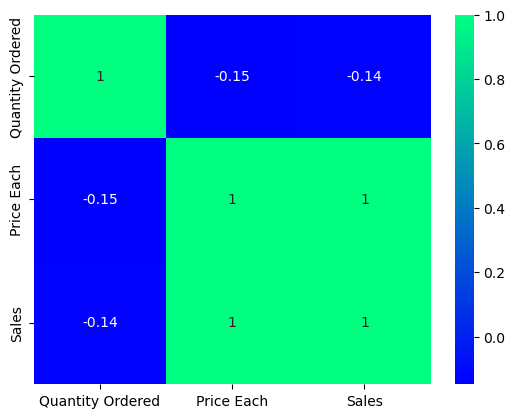

In [22]:
sns.heatmap(main_df.corr(), cmap='winter', annot=True );

Price Each and Sales Attributes are highly correlated.

Since, Sales is directly proportional to Price of Each Items.

## I) Determining Top 3 Months with Maximum and Minimum Sales in 2019.

In [23]:
main_df['Order Date'].dtypes

dtype('O')

### Converting Object type into python Date Time Object using `pd.to_datetime()`

This takes little time for processing. Just be Patience!

In [24]:
main_df['Order Date'] = pd.to_datetime(main_df['Order Date'])
main_df['Order Date'].dtypes

dtype('<M8[ns]')

#### <M8[ns] is equivalent to Python DateTime DataType

In [25]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68


Adding `Month` attribute to `main_df` which consists month of Order Date

In [26]:
main_df['month_no'] = main_df['Order Date'].dt.month
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,8
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,8
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,8
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,8
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,8


In [27]:
main_df['month_no'].dtypes

dtype('int64')

In [28]:
main_df['Month'] = main_df['month_no'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                      5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,8,Aug
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,8,Aug
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,8,Aug
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,8,Aug
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,8,Aug


### Sorting our `main_df` by Month.

In [29]:
main_df = main_df.sort_values(by='month_no')
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan


### Making Datasets Ready for `Bar Graph`

In [30]:
# Creating monthly_sales dataframe for Ploting...

monthly_sales = main_df.groupby('Month', sort=False).sum() # sort=False for not arrranging month in Alphabetical Order.
monthly_sales.reset_index(inplace=True)
monthly_sales['Month']

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: Month, dtype: object

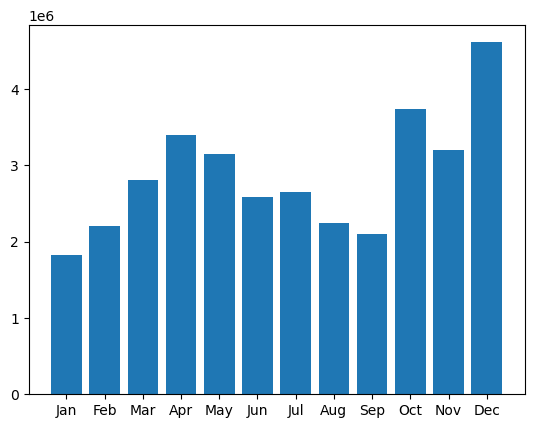

In [31]:
plt.bar(monthly_sales['Month'], monthly_sales['Sales']);

le6 is standard scientific notion, and here it indicates an overall scale factor for the y-axis. That is, if there's a 2 on the y-axis and a 1e6 at the top, the value at 2 actually indicates 2*1e6 = 2e6 = 2 * 10^6 = 2,000,000.

### `Bar Graph of Monthwise Sales of Year 2019`

Styling above graph for Clear Visualization

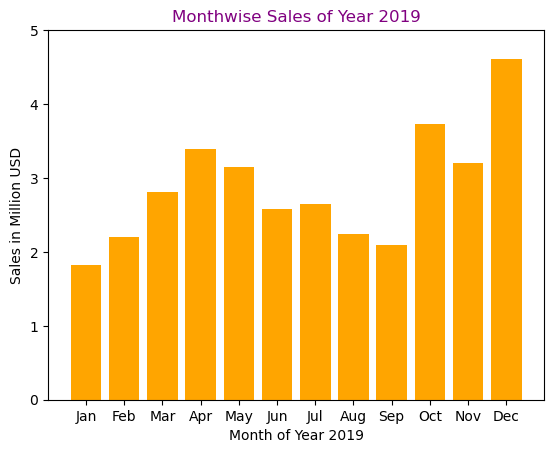

In [32]:
plt.bar(monthly_sales['Month'], monthly_sales['Sales'], color='orange')
labels, location = plt.yticks()
plt.yticks(labels, ((labels/1000000).astype(int))) # Scalling in Million USD
plt.ylabel('Sales in Million USD')
plt.xlabel('Month of Year 2019')
plt.title('Monthwise Sales of Year 2019').set_color('purple')

In the month of December of year 2019, the maximum sales occurred, may be because of Holiday and Christmas in December and in the month of Jan, the minimum sales occurred.

In [33]:
monthly_sales.head()

,Month,Quantity Ordered,Price Each,Sales,month_no
0,Jan,10893,1810924.81,1821413.16,9699
1,Feb,13431,2186940.38,2200078.08,23914
2,Mar,16979,2789084.64,2804973.35,45384
3,Apr,20536,3366218.76,3389217.98,73028
4,May,18653,3133134.61,3150616.23,82760


In [34]:
monthly_sales.dtypes

Month                object
Quantity Ordered      int64
Price Each          float64
Sales               float64
month_no              int64
dtype: object

### `Horizontal Bar Graph using Seaborn`

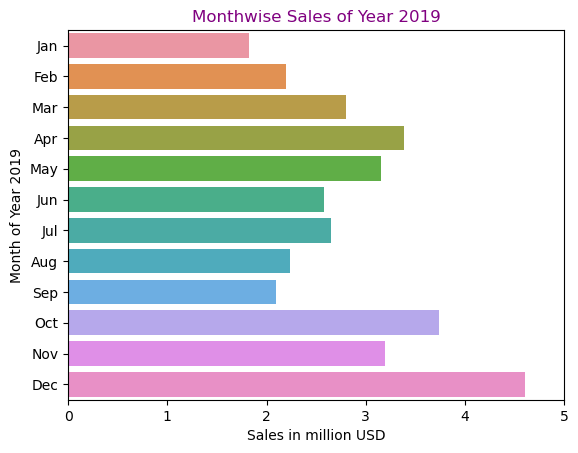

In [35]:
ax = sns.barplot(x=monthly_sales['Sales'],
            y=monthly_sales['Month'])
ax.set_yticklabels(labels=list(monthly_sales['Month']) , rotation=0)
plt.ylabel('Month of Year 2019')
plt.xlabel('Sales in million USD')
plt.title('Monthwise Sales of Year 2019').set_color('purple')
labels, location = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int));

### Displaying Top 3 Months with Maximum and Minimum Sales.

In [36]:
top_3_months = monthly_sales[['Month', 'Sales']].sort_values(by='Sales', ascending=False)[:3].set_index('Month')
print(f"Top 3 Months with Maximum Sales\n\n{top_3_months}\n\n")
bottom_3_months = monthly_sales[['Month', 'Sales']].sort_values(by='Sales')[:3].set_index('Month')
print(f"Top 3 Months with Minimum Sales\n\n{bottom_3_months}")

Top 3 Months with Maximum Sales

            Sales
Month            
Dec    4608295.70
Oct    3734777.86
Apr    3389217.98


Top 3 Months with Minimum Sales

            Sales
Month            
Jan    1821413.16
Sep    2094465.69
Feb    2200078.08


`December` was the best month of Sales in 2019 with Sales of $4,608,295.70.

`January` was the wrost month of Sales in 2019 with Sales of $1,821,413.16

## II) Top 3 Cities with Maximum  and Minimum Sales in year 2019

In [37]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan


   ###   Creating & Adding `City` attribute with values as `city_name(Abbreviated_State_name)`


In [38]:
def get_city_name(address):
    return address.split(',')[1]

def get_Abbreviated_state_name(address):
    return address.split(',')[2].split(' ')[1]

## NOTE:

In our datasets, there are 2 cities named exactly the same but of different States. Example: Portland city is in two state of USA(OR: , ME:) So, we should also grab the state name along with city name for making City attribute Distinct.

In [39]:
temp_df = main_df.copy()
temp_df['City'] = main_df['Purchase Address'].apply(lambda x: get_city_name(x))
temp_df['State'] = main_df['Purchase Address'].apply(lambda x: get_Abbreviated_state_name(x))
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month,City,State
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan,San Francisco,CA
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan,Seattle,WA
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan,San Francisco,CA
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan,Austin,TX
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan,Los Angeles,CA


In [40]:
temp_df[temp_df['City'] == ' Portland'][['City', 'State']].value_counts()

City       State
 Portland  OR       9998
           ME       2451
dtype: int64

Here, Portland city is in OR(Oregon) and ME(Maine) state of USA

reference: https://www.scouting.org/resources/los/states/

### Adding `City` attribute to our `main_df`

In [41]:
main_df['City'] = main_df['Purchase Address'].apply(lambda x: f"{get_city_name(x)}({get_Abbreviated_state_name(x)})")
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month,City
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan,San Francisco(CA)
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan,Seattle(WA)
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan,San Francisco(CA)
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan,Austin(TX)
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan,Los Angeles(CA)


### Group dataframe by `City` and extracting City-wise Sales

In [42]:
city_with_sales_df = main_df.groupby('City')[['Quantity Ordered', 'Sales']].sum()
city_with_sales_df.head()

,Quantity Ordered,Sales
City,,
Atlanta(GA),16584,2794199.07
Austin(TX),11137,1818044.33
Boston(MA),22494,3658627.65
Dallas(TX),16707,2765373.96
Los Angeles(CA),33247,5448304.28


In [43]:
city_with_sales_df.reset_index(inplace=True)
city_with_sales_df.head()

,City,Quantity Ordered,Sales
0,Atlanta(GA),16584,2794199.07
1,Austin(TX),11137,1818044.33
2,Boston(MA),22494,3658627.65
3,Dallas(TX),16707,2765373.96
4,Los Angeles(CA),33247,5448304.28


### ` Ploting Bar Graph between Cities with their Total Sales`

In [44]:
city_with_sales_df = city_with_sales_df.sort_values(by='Sales')
city_with_sales_df.head()

,City,Quantity Ordered,Sales
6,Portland(ME),2746,449321.38
1,Austin(TX),11137,1818044.33
7,Portland(OR),11291,1870010.56
9,Seattle(WA),16534,2745046.02
3,Dallas(TX),16707,2765373.96


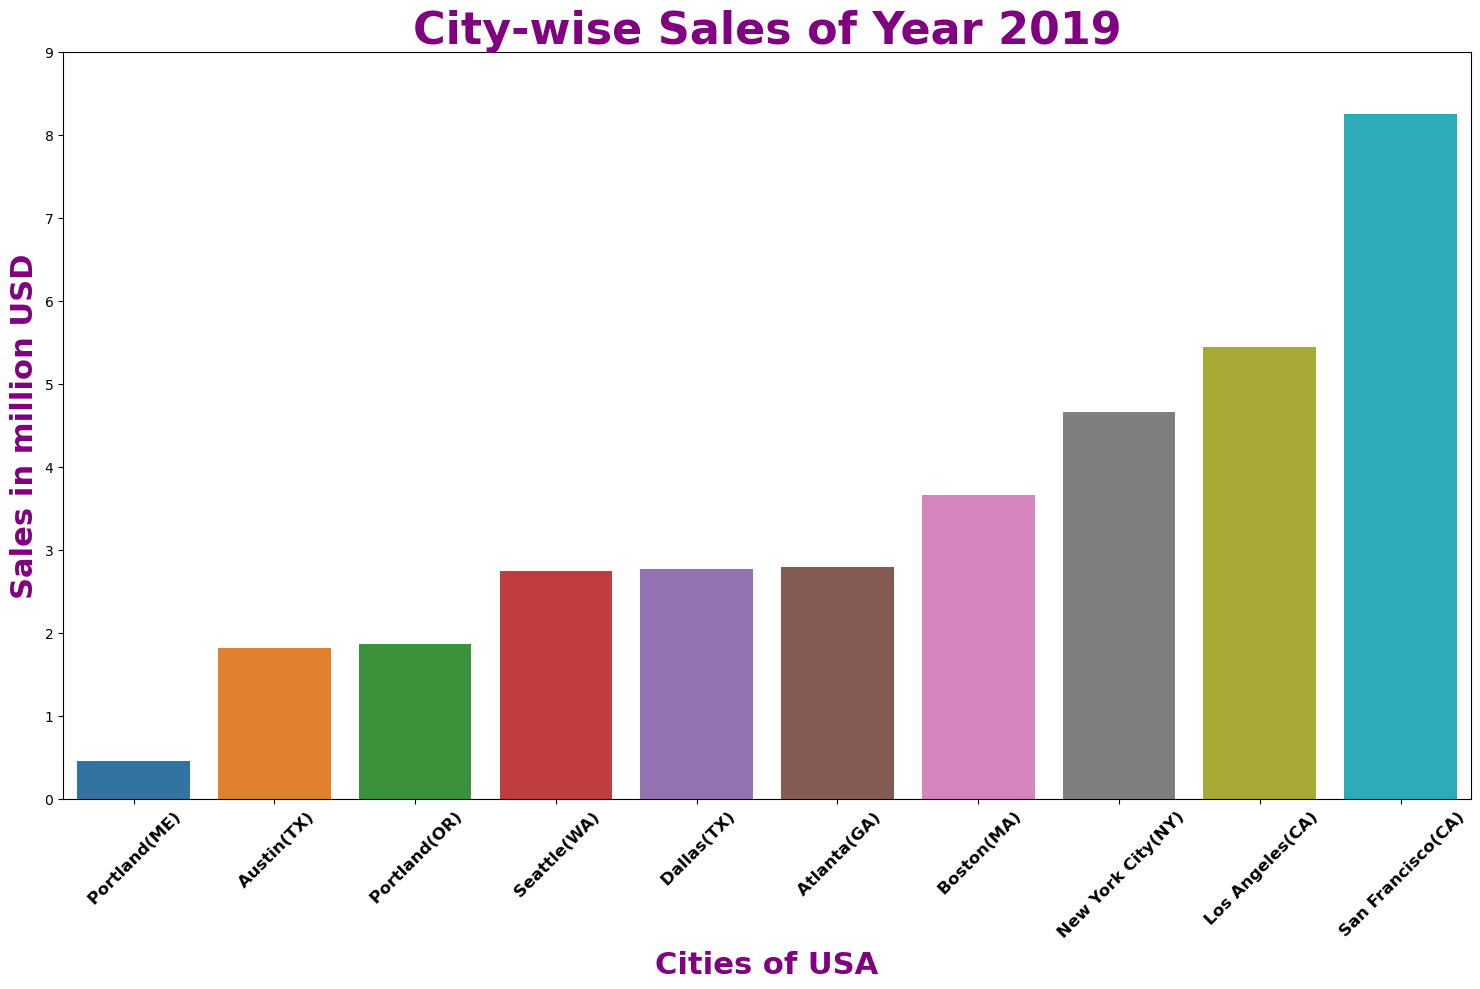

In [45]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax = sns.barplot(x=city_with_sales_df['City'],
                 y=city_with_sales_df['Sales'])
ax.set_xticklabels(labels=list(city_with_sales_df['City']) , rotation=45, fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Cities of USA', fontsize=22, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Sales in million USD', fontsize=22, fontweight='bold').set_color('purple')
plt.title(label='City-wise Sales of Year 2019', fontsize=32, fontweight='bold').set_color('purple')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.tight_layout();

## ` Displaying Top/Bottom 3 Cities with their Total Sales.`

In [46]:
top_3_cities = city_with_sales_df[['City', 'Sales']].sort_values(by='Sales', ascending=False)[:3].set_index('City')
print(f"Top 3 Cities with Maximum Sales\n\n{top_3_cities}\n\n")
bottom_3_cities = city_with_sales_df[['City', 'Sales']].sort_values(by='Sales')[:3].set_index('City')
print(f"Top 3 cities with Minimum Sales\n\n{bottom_3_cities}")

Top 3 Cities with Maximum Sales

                         Sales
City                          
 San Francisco(CA)  8254743.55
 Los Angeles(CA)    5448304.28
 New York City(NY)  4661867.14


Top 3 cities with Minimum Sales

                    Sales
City                     
 Portland(ME)   449321.38
 Austin(TX)    1818044.33
 Portland(OR)  1870010.56


`San Francisco(CA)` was the best City of Sales in 2019 with Sales of $ 8,254,743.55

`Portland(ME)` was the wrost City of Sales in 2019 with Sales of $ 449,321.38

## III) Mining Best Time to Display Advertisements to Maximize the Sales.

### Converting `Order Date` into `Py DateTime Datatype` & Appending `Hour` Attribute.

In [47]:
main_df['Order_Date_DTO'] = pd.to_datetime(main_df['Order Date'])
main_df['Hour'] = main_df['Order_Date_DTO'].dt.hour
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month,City,Order_Date_DTO,Hour
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan,San Francisco(CA),2019-01-28 12:11:00,12
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan,Seattle(WA),2019-01-30 18:53:00,18
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan,San Francisco(CA),2019-01-02 09:45:00,9
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan,Austin(TX),2019-01-04 08:21:00,8
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan,Los Angeles(CA),2019-01-26 23:31:00,23


###  Grouping Datasets by `Hour` & Prepare a Dataframe for Ploting.

In [48]:
order_hour_df = main_df.groupby('Hour')['Quantity Ordered'].count().reset_index(name='No. of Orders')
order_hour_df.head()

,Hour,No. of Orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


### Ploting `Line Plot` between Total no. of Orders made in Different Hour of the Day.

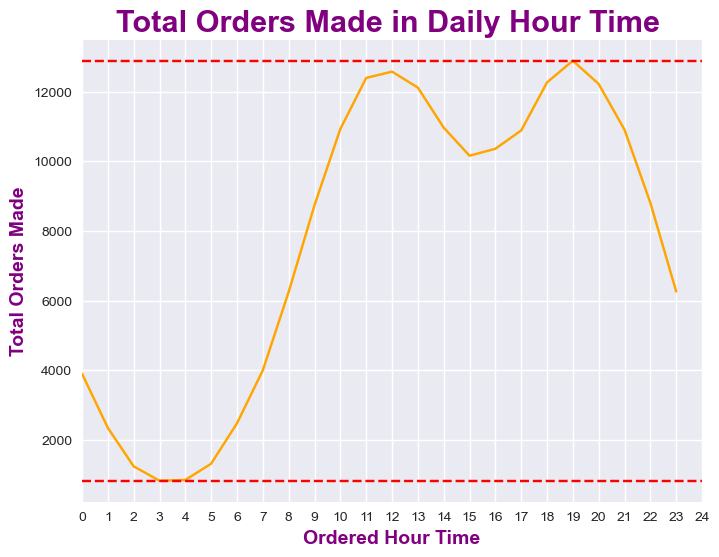

In [49]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(order_hour_df['Hour'], order_hour_df['No. of Orders'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time ', fontsize=22, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(order_hour_df['No. of Orders'].max(), linestyle='--', c='red')
plt.axhline(order_hour_df['No. of Orders'].min(), linestyle='--', c='red');

As you can see from the Figure , there are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). 

From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

### `Remember: `

This chart is the total orders of all cities. Thus, making a spesific chart for a specific city and planning accordingly for the advertisement will be far more productive for that city.

### `Analyzing Citywise Orders & Making Specific Chart`

It will be really better if we determine separately the `Best Advertisement Time` for Each City.  Here, we plot with city with maximum sales i.e. San Francisco(CA) and minimum sales i.e. Portland(ME).

#### Chart for `San Francisco(CA)` and ` Portland(ME)`

In [50]:
ads_city_hour_df = main_df.groupby(['Hour', 'City'])['Quantity Ordered'].count()
ads_city_hour_df.head()

Hour  City            
0      Atlanta(GA)        310
       Austin(TX)         198
       Boston(MA)         426
       Dallas(TX)         283
       Los Angeles(CA)    634
Name: Quantity Ordered, dtype: int64

In [51]:
ads_city_hour_df = ads_city_hour_df.unstack().fillna(0)
ads_city_hour_df.head()

City,Atlanta(GA),Austin(TX),Boston(MA),Dallas(TX),Los Angeles(CA),New York City(NY),Portland(ME),Portland(OR),San Francisco(CA),Seattle(WA)
Hour,,,,,,,,,,
0,310,198,426,283,634,557,48,223,937,286
1,213,128,220,168,397,328,34,123,569,167
2,112,70,119,92,197,164,14,71,315,88
3,57,54,80,69,116,100,11,47,219,77
4,80,42,90,55,124,106,11,51,217,76


### `Note:`

Here, city name consists of total no. of Orders made with Daily Hour Time(Row-wise).

Total Orders Made = 310 in Atlanta(GA) for Hour= 0(12AM)

In [52]:
ads_city_hour_df.columns

Index([' Atlanta(GA)', ' Austin(TX)', ' Boston(MA)', ' Dallas(TX)',
       ' Los Angeles(CA)', ' New York City(NY)', ' Portland(ME)',
       ' Portland(OR)', ' San Francisco(CA)', ' Seattle(WA)'],
      dtype='object', name='City')

#### Extracting Columns of `San Francisco(CA)` and `Portland(ME)` & Making DF for Ploting.

In [53]:
SanFranciscoCA_hour_df = pd.DataFrame(ads_city_hour_df[' San Francisco(CA)'])
SanFranciscoCA_hour_df.reset_index(inplace=True)
SanFranciscoCA_hour_df.head()

,Hour,San Francisco(CA)
0,0,937
1,1,569
2,2,315
3,3,219
4,4,217


In [54]:
PortlandME_hour_df = pd.DataFrame(ads_city_hour_df[' Portland(ME)'])
PortlandME_hour_df.reset_index(inplace=True)
PortlandME_hour_df.head()

,Hour,Portland(ME)
0,0,48
1,1,34
2,2,14
3,3,11
4,4,11


####  Ploting for `SanFranscisco(CA)`

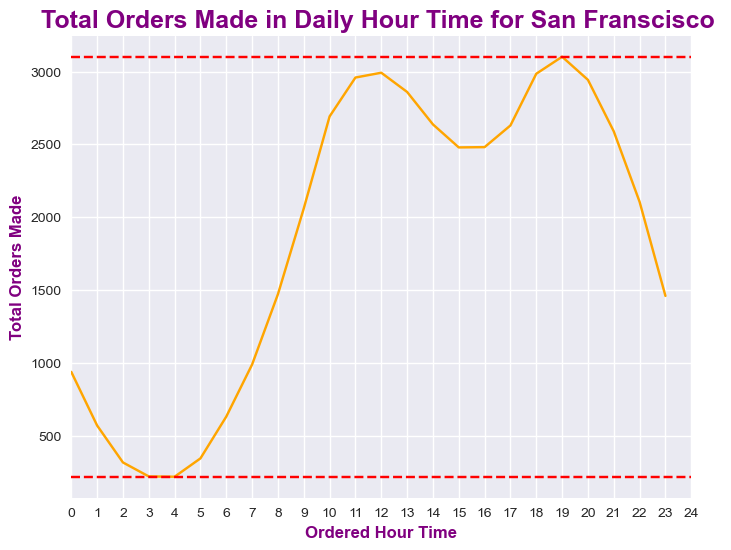

In [55]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(SanFranciscoCA_hour_df['Hour'], SanFranciscoCA_hour_df[' San Francisco(CA)'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=12, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=12, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time for San Franscisco ', fontsize=18, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(SanFranciscoCA_hour_df[' San Francisco(CA)'].max(), linestyle='--', c='red')
plt.axhline(SanFranciscoCA_hour_df[' San Francisco(CA)'].min(), linestyle='--', c='red');

For `Sans Franscisco(CA)` ,

Best Advertisement Time will be right before 12 A.M and/or 7 P.M.

It could be 11:30 A.M and/or 6:30 PM.

####  Ploting for `Portland(ME)`

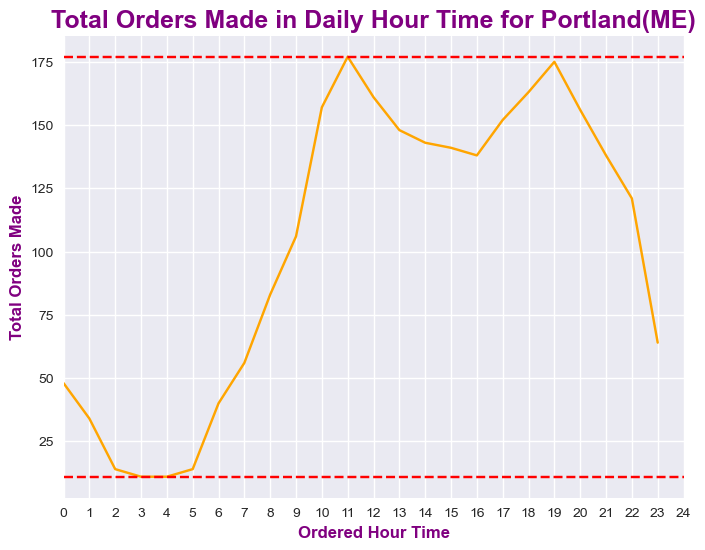

In [56]:
#Styling our plots and dimensions.

plt.style.use('seaborn')
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

# Ploting Line Plot.
plt.plot(PortlandME_hour_df['Hour'], PortlandME_hour_df[' Portland(ME)'], color='orange') #plt.plot(x,y)

# Adding labels and Styling to Labels

plt.xlabel(xlabel='Ordered Hour Time', fontsize=12, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Total Orders Made', fontsize=12, fontweight='bold').set_color('purple')
plt.title(label='Total Orders Made in Daily Hour Time for Portland(ME)', fontsize=18, fontweight='bold').set_color('purple')

plt.xticks(range(0,25))
plt.xlim([0,24])

plt.axhline(PortlandME_hour_df[' Portland(ME)'].max(), linestyle='--', c='red')
plt.axhline(PortlandME_hour_df[' Portland(ME)'].min(), linestyle='--', c='red');

For `Portland(ME)` ,

Best Advertisement Time will be right before 11 A.M and/or 7 P.M.

It could be 10:30 A.M and/or 6:30 PM.

##  IV) Top 5-Most Ordered /Sold Product 

In [57]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month,City,Order_Date_DTO,Hour
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan,San Francisco(CA),2019-01-28 12:11:00,12
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan,Seattle(WA),2019-01-30 18:53:00,18
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan,San Francisco(CA),2019-01-02 09:45:00,9
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan,Austin(TX),2019-01-04 08:21:00,8
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan,Los Angeles(CA),2019-01-26 23:31:00,23


### Grouping datasets by `Product` & Summing Numeric Columns

In [58]:
product_df = main_df.groupby('Product').sum()
product_df = product_df.reset_index()
product_df.head()

,Product,Quantity Ordered,Price Each,Sales,month_no,Hour
0,20in Monitor,4126,450739.02,453818.74,29319,58729
1,27in 4K Gaming Monitor,6239,2427687.75,2433147.61,44396,90841
2,27in FHD Monitor,7541,1124625.02,1131074.59,52484,107422
3,34in Ultrawide Monitor,6192,2346058.26,2352898.08,43258,88957
4,AA Batteries (4-pack),27615,78942.72,106041.60,145423,298077


### Ploting the Bar Graph.

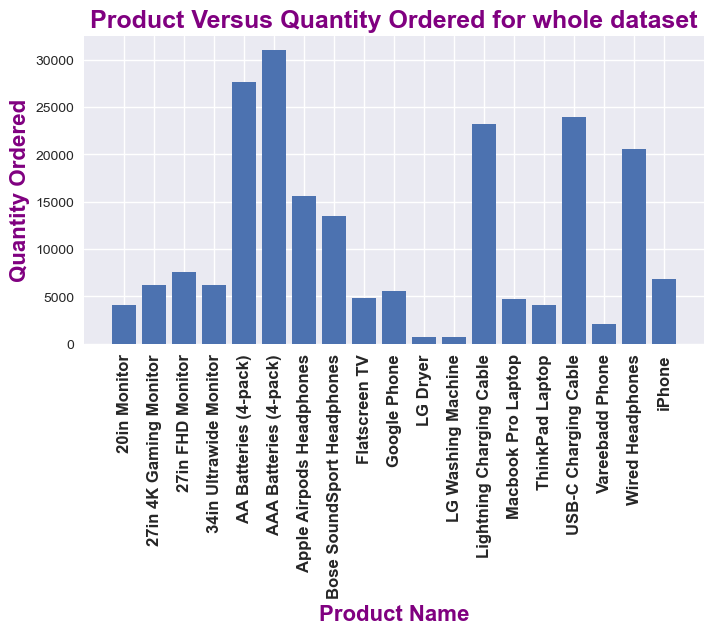

In [59]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(8)

plt.bar(product_df['Product'], product_df['Quantity Ordered'])
plt.xticks(ticks = list( product_df['Product']), rotation='vertical', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Product Name', fontsize=16, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Quantity Ordered', fontsize=16, fontweight='bold').set_color('purple')
plt.title(label='Product Versus Quantity Ordered for whole dataset', fontsize=18, fontweight='bold').set_color('purple');

Most Ordered/Sold Product Name in 2019: `AAA Batteries(4-Pack)`

### Displaying Top 5 Most Ordered Product.

In [60]:
top_5_product_df = product_df.sort_values(by='Quantity Ordered', ascending=False)[['Product', 'Quantity Ordered']][:5]
print(f"Top 5 Most Ordered/Sold Products\n\n{top_5_product_df.set_index('Product')}")

Top 5 Most Ordered/Sold Products

                          Quantity Ordered
Product                                   
AAA Batteries (4-pack)               30986
AA Batteries (4-pack)                27615
USB-C Charging Cable                 23931
Lightning Charging Cable             23169
Wired Headphones                     20524


These Products are ordered most Frequently because they have low unit cost.  

### Analyzing & Demonstrating Facts/Hypothesis behind Most Ordered/Sold Product.

In [61]:
unit_cost_df = main_df.groupby('Product').mean()['Price Each']
unit_cost_df = unit_cost_df.reset_index(name='Unit Cost')
unit_cost_df.head()

,Product,Unit Cost
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84


C:\Users\Abhishek Thapa\AppData\Local\Temp\ipykernel_5412\625771362.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=product_df['Product'], rotation='vertical', size=10)


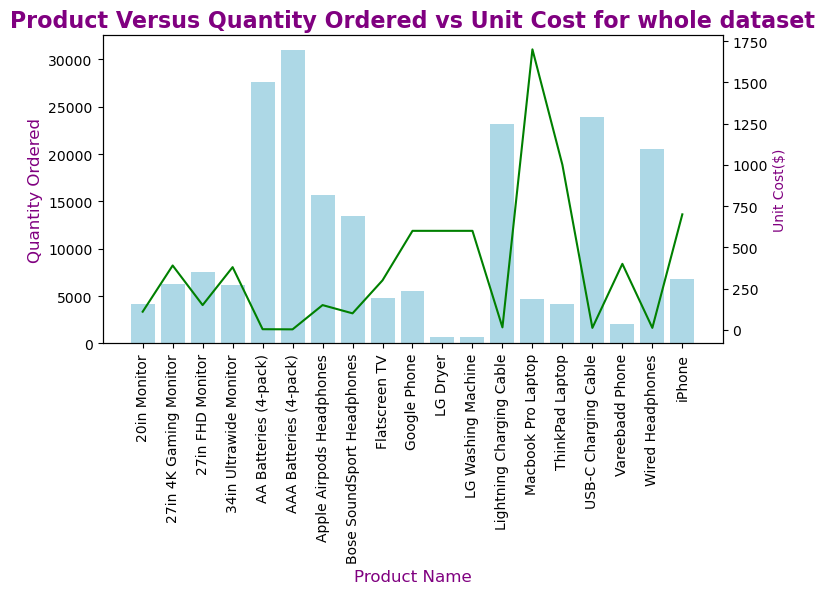

In [62]:
plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

ax1.bar(product_df['Product'], product_df['Quantity Ordered'], color='lightblue')
ax2.plot(unit_cost_df['Product'], unit_cost_df['Unit Cost'], color='green')

ax1.set_xlabel('Product Name', color='purple', size=12)
ax1.set_ylabel('Quantity Ordered', color='purple', size=12)
ax2.set_ylabel('Unit Cost($)', color='purple')
ax1.set_xticklabels(labels=product_df['Product'], rotation='vertical', size=10)
plt.title(label='Product Versus Quantity Ordered vs Unit Cost for whole dataset', fontsize=16, fontweight='bold').set_color('purple');

### `Ignoring` Warnings importing `Warning` modules is not a good idea as we will ignore some informative warnings and way of handling them.

#### Ignoring this warining for now as it doesn't create any impact for now.

Let's analyze and demonstate our facts/hypothesis: `The most Ordered/Sold products have low price.`

From the graph, we can see the Unit Cost of Top 5-Most Ordered/Sold Products such as: AAA Batteries, Charging Cables, Headphones is low. Thus, `our Hypthesis was True.`

Also, even though the Unit Cost for Laptops are very high, they are ordered/sold more than some of low unit cost equipments than that of Lapops. This is because large number of people need laptops and ultimately, it has high demands.

## V) Market Basket Analysis- Apriori Algorithm & Association Rule Mining.

`Market basket analysis` is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns.

The `Apriori algorithm` is used for mining frequent itemsets and devising association rules from a transactional database. The parameters “support” and “confidence” are used. Support refers to items' frequency of occurrence; confidence is a conditional probability. Items in a transaction form an item set.

`Association rule mining` is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

#### For more detailed, Learn from Videos and Vlogs. ( I've already studied about these in DataMining subject in my College)

In [63]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,month_no,Month,City,Order_Date_DTO,Hour
61134,143879,USB-C Charging Cable,1,11.95,2019-01-28 12:11:00,"665 Adams St, San Francisco, CA 94016",11.95,1,Jan,San Francisco(CA),2019-01-28 12:11:00,12
62887,145550,Apple Airpods Headphones,1,150.00,2019-01-30 18:53:00,"505 North St, Seattle, WA 98101",150.00,1,Jan,Seattle(WA),2019-01-30 18:53:00,18
62886,145549,Apple Airpods Headphones,1,150.00,2019-01-02 09:45:00,"644 1st St, San Francisco, CA 94016",150.00,1,Jan,San Francisco(CA),2019-01-02 09:45:00,9
62885,145548,iPhone,1,700.00,2019-01-04 08:21:00,"695 2nd St, Austin, TX 73301",700.00,1,Jan,Austin(TX),2019-01-04 08:21:00,8
62884,145547,AAA Batteries (4-pack),1,2.99,2019-01-26 23:31:00,"446 Madison St, Los Angeles, CA 90001",2.99,1,Jan,Los Angeles(CA),2019-01-26 23:31:00,23


In [64]:
main_df.shape

(185686, 12)

In [65]:
main_df['Order ID'].duplicated().sum()

7249

reference = https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

### This Code was used for testing for Small slice of our main datasets and finally with more than 5hours of hit and trail i prepare datasets in appropriate form for applying appriori algorithm

transaction_df = main_df.groupby('Order ID')['Product'].apply(','.join).reset_index()

transaction_df

transaction_df.isna().sum()

transaction_df.duplicated().sum()

transaction_df['Order ID'].duplicated().sum()

transaction_df[transaction_df['Order ID'] == '141384']

#for key, item in transaction_df:

    #print(transaction_df.get_group(key), "\n")

#for key, item in transaction_df:

     #print(item, "\n")

       #Order ID  #Product

#58497   141384  USB-C Charging Cable

#58496   141384          Google Phone

mini_trans_df = transaction_df[:200].copy()
mini_trans_df.iloc[150]

trans_lst = (mini_trans_df['Product'].iloc[150].split(','))
len(trans_lst)
#trans_lst

trans_lst = []

for i in range(0, len(mini_trans_df)):

    trans_lst.append(mini_trans_df['Product'].iloc[i].split(','))
    
trans_lst

txdf = pd.DataFrame(trans_lst)

#pd.set_option('display.max_rows', None)
pd.reset_option("display.max_rows")

txdf.columns

txdf.iloc[150]

txdf.fillna(float("nan"), inplace=True)
txdf

txdf.isna().sum()

## a) Preparing Our Datasets in Appropriate Form for Apriori Algorithm

### Grouping Datasets by `Order ID`

We will appends items with same `Order ID` and separated them by `,` so that items which are bought together i.e. with same `Order ID` will be together in our dataset. Thus, our dataset will be like:

<img src="./images/apriori-format.png"/>

Thus, for this dataset, we can apply Apriori Algorithm.

In [66]:
transaction_df = main_df.groupby('Order ID')['Product'].apply(','.join).reset_index()
transaction_df.head()

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


Let's Check there are any `NaN` values and also `duplicated tuples`.

In [67]:
transaction_df.isna().sum()

Order ID    0
Product     0
dtype: int64

In [68]:
transaction_df.duplicated().sum()

0

Also, check if there is any duplicated `Order ID`. There must not be any duplicated tuples because items with same `Order ID` are appended together in only one `Order ID` values.

In [69]:
transaction_df.duplicated().sum()

0

Let's check one sample dataset with more than 1 items for same `Order ID`

In [70]:
transaction_df[transaction_df['Order ID'] == '141384']

,Order ID,Product
150,141384,"USB-C Charging Cable,Google Phone"


Here, `Order ID` acts like `Tx ID`.

### Extracting Product Values as list of list of Products & Conveting it into DataFrame

Thus, we will get our final Dataframe for applying Apriori

<img src="./images/apriori-format.png"/>

In [71]:
#Extracting list of list of Products (Nested List)

trans_items_lst = []
for i in range(0, len(transaction_df)):
    trans_items_lst.append(transaction_df['Product'].iloc[i].split(','))
trans_items_lst[40:45]

[['USB-C Charging Cable'],
 ['Wired Headphones', 'USB-C Charging Cable'],
 ['Lightning Charging Cable'],
 ['Bose SoundSport Headphones'],
 ['Lightning Charging Cable']]

In [72]:
# Converting into DataFrame.

txdf = pd.DataFrame(trans_items_lst)
txdf.head()

,0,1,2,3,4
0,iPhone,None,None,None,None
1,Lightning Charging Cable,None,None,None,None
2,Wired Headphones,None,None,None,None
3,27in FHD Monitor,None,None,None,None
4,Wired Headphones,None,None,None,None


In [73]:
txdf.iloc[150]

0    USB-C Charging Cable
1            Google Phone
2                    None
3                    None
4                    None
Name: 150, dtype: object

In [74]:
txdf.fillna(float("nan"), inplace=True)
txdf.head()

,0,1,2,3,4
0,iPhone,NaN,NaN,NaN,NaN
1,Lightning Charging Cable,NaN,NaN,NaN,NaN
2,Wired Headphones,NaN,NaN,NaN,NaN
3,27in FHD Monitor,NaN,NaN,NaN,NaN
4,Wired Headphones,NaN,NaN,NaN,NaN


In [75]:
txdf.isna().sum()

0         0
1    171558
2    178084
3    178421
4    178436
dtype: int64

In [76]:
txdf.size

892185

## b) Applying Apriori Algorithm

a) First, Finding Rules from Frequent Itemsets of length=2

b) Secondly, Finding Rules from Frequent Itemsets of length=3 and can be changed.(Generalized)

Min_Support, Min_Confidence and Lift values are taken randomly for this task.

## A) Generating Rules for FreItemsets of Length=2

### Extracting each row as List.

In [77]:
txitem_list = []
for i in range(1,len(txdf)):
    txitem_list.append([str(txdf.values[i,j]) for j in range(0,txdf.shape[1])])

In [78]:
txitem_list[:1]

[['Lightning Charging Cable', 'nan', 'nan', 'nan', 'nan']]

For instaling apyori, 

!pip install apyori

In [79]:
0.001 * len(txitem_list), len(txitem_list)

(178.436, 178436)

In [80]:
from apyori import apriori

#applying apriori algorithm

association_rules = apriori(txitem_list, min_support=0.0001, min_confidence= 0.1, min_lift = 1, min_length=2)
association_results = list(association_rules)

### You can uncomment those commented lines and see results and analyze.

In [81]:
# for i in range(0, len(association_results)):
#     print(association_results[i][0])


In [82]:
print(len(association_results))

101


In [83]:
# for item in association_results[:1]:
#     if len(list(item[0])) == 2 and not "nan" in list(item[0]):
#         print(item,"\n\n")

In `Each OrderedStatistics` items_base is the antecedent and the items_add is the consequent.

So our rule will be:

    items_base --> items_add

In [84]:
rule_lst = []
support_lst = []
confidence_lst = []
lift_lst = []

for item in association_results:
#     print(item)
#     print(f"{item}\n\n")
    if len(list(item[0])) == 2 and not "nan" in item[0]:
        for rule in item[2]:
            print(list(item[0]))
            if len(list(rule[0])) > 0 and len(list(rule[1])) > 0: # Some rules may contain empty antecedents or consequences
                rule_lst.append(f"({' & '.join(rule[0])}) ->  ({' & '.join(rule[1])})")
                support_lst.append(float(item[1]))
                confidence_lst.append(float(rule[2]))
                lift_lst.append(float(rule[3])) 

['USB-C Charging Cable', 'Google Phone']
['iPhone', 'Lightning Charging Cable']
['USB-C Charging Cable', 'Vareebadd Phone']


In [85]:
# rule_lst = []
# support_lst = []
# confidence_lst = []
# lift_lst = []

# for item in association_results:
#     pair = item[0]
#     print(pair)
#     items = [x for x in pair]
#     if len(items) == 2 and not "nan" in items:
#         rule_lst.append(f"({items[0]}) ->  ({items[1]})")
#         # second index of the inner list
#         print()
#         support_lst.append(float(item[1]))
#         confidence_lst.append(float(item[2][0][2]))
#         lift_lst.append(float(item[2][0][3])) 

In [86]:
result_df = pd.DataFrame({'Rule': rule_lst,
                          'Support': support_lst,
                          'Confidence': confidence_lst,
                          'Lift': lift_lst})
result_df['Support Count'] = result_df['Confidence'].apply(lambda x: x*len(txitem_list))
result_df.head()

,Rule,Support,Confidence,Lift,Support Count
0,(Google Phone) -> (USB-C Charging Cable),0.005587,0.180551,1.474112,32216.713510
1,(iPhone) -> (Lightning Charging Cable),0.005666,0.147829,1.220975,26377.949408
2,(Vareebadd Phone) -> (USB-C Charging Cable),0.002062,0.178208,1.454988,31798.764165


## This is Rules Table Generated from frequent itemsets of 2 items.

#### Sorting it by `Confidence` in Decending Orders.

In [87]:
result_df.columns

Index(['Rule', 'Support', 'Confidence', 'Lift', 'Support Count'], dtype='object')

In [88]:
len(result_df)

3

In [89]:
result_df = result_df.sort_values(by='Confidence', ascending=False)
print("## This is Sorted Rules Table in descending order, Generated from frequent itemsets of 2 items.")
result_df.head()

## This is Sorted Rules Table in descending order, Generated from frequent itemsets of 2 items.


,Rule,Support,Confidence,Lift,Support Count
0,(Google Phone) -> (USB-C Charging Cable),0.005587,0.180551,1.474112,32216.713510
2,(Vareebadd Phone) -> (USB-C Charging Cable),0.002062,0.178208,1.454988,31798.764165
1,(iPhone) -> (Lightning Charging Cable),0.005666,0.147829,1.220975,26377.949408


### Conclusion:

Customers who buy `Google Phone` are 18.05% likely to buy `USB-C Charging Cable`

## B) Generating Rules for FreItemsets of Length=3

It took me nearly a whole day to do this functioning. So, just play with codes, print results at every steps but don't forgot to know what is our required result. We can go through `mlxtend` Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks.

In [90]:
from apyori import apriori

#applying apriori algorithm
association_rules = apriori(txitem_list, min_support=0.0001, min_confidence=0.1, min_lift=1, min_length=3)
association_results = list(association_rules)

In [91]:
print(len(association_results))

101


In [92]:
# do_lst = ['A']
# print('&'.join(do_lst))

For making this code and generating this idea took nearly 5/6 hours with lots of printing, debugging and analysis.So, just print output at every steps breaking the codes below. Don't go in rush, Just go slow you will understand. If you still not understand, just contact me. Link in Last of this file.

In [93]:
rule_lst = []
support_lst = []
confidence_lst = []
lift_lst = []
valid_itemsets = []
frequent_itemsets_length = 3 # considering length of  itemsets for rule mining.
for item in association_results:
#     print(list(item[0]))
    if not "nan" in item[0] and len(list(item[0])) == frequent_itemsets_length:
#         print(list(item), "\n")
        for rule in item[2]:
#             valid_itemsets.append(item)
#             print(rule, "\n")
            if len(list(rule[0])) > 0 and len(list(rule[1])) > 0: # Some rules may contain empty antecedents or consequences
                rule_lst.append(f"({' & '.join(list(rule[0]))}) --> ({' & '.join(list(rule[1]))})")
                support_lst.append(float(item[1]))
                confidence_lst.append(float(rule[2]))
                lift_lst.append(float(rule[3]))
                
# print(f"Length of support_lst:{len(support_lst)}\nLength of rule_lst:{len(rule_lst)}\nLength of confidence_lst:
#       {len(confidence_lst)}\nLength of lift_lst:{len(lift_lst)}\n")

result_df = pd.DataFrame({'Rule': rule_lst,
                          'Support': support_lst,
                          'Confidence': confidence_lst,
                          'Lift': lift_lst})
result_df['Support Count'] = result_df['Support'].apply(lambda x: x*len(txitem_list))
pd.options.display.max_colwidth = 100 ## For Printing column Values with large no of Characters.
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(f"This is Sorted Rules Table in descending order, Generated from frequent itemsets of {frequent_itemsets_length} items.")
result_df

This is Sorted Rules Table in descending order, Generated from frequent itemsets of 3 items.


,Rule,Support,Confidence,Lift,Support Count
8,(Lightning Charging Cable & Wired Headphones) --> (iPhone),0.000353,0.488372,12.742091,63.0
7,(USB-C Charging Cable & Wired Headphones) --> (Google Phone),0.000488,0.428571,13.848709,87.0
0,(Apple Airpods Headphones & Lightning Charging Cable) --> (iPhone),0.000263,0.405172,10.571333,47.0
4,(Bose SoundSport Headphones & USB-C Charging Cable) --> (Google Phone),0.000196,0.343137,11.088019,35.0
5,(Bose SoundSport Headphones & Wired Headphones) --> (Google Phone),0.000135,0.324324,10.480104,24.0
2,(Apple Airpods Headphones & Wired Headphones) --> (iPhone),0.000151,0.270000,7.044556,27.0
11,(Wired Headphones & Vareebadd Phone) --> (USB-C Charging Cable),0.000185,0.221477,1.808254,33.0
6,(Google Phone & Wired Headphones) --> (USB-C Charging Cable),0.000488,0.206161,1.683211,87.0
10,(USB-C Charging Cable & Wired Headphones) --> (Vareebadd Phone),0.000185,0.162562,14.046895,33.0
3,(Bose SoundSport Headphones & Google Phone) --> (USB-C Charging Cable),0.000196,0.153509,1.253328,35.0


### Conclusion:

Customers who buy `Lightning Charging Cable & Wired Headphones` are 48.83 % likely to buy `iPhone`

### These are the printed records of Sample which i kept here just to understand when i will be back to it after long gap.

You can also print and record and do your analysis.

#### Sample Output of print(item): 
    
RelationRecord(items=frozenset({'iPhone', 'Apple Airpods Headphones', 'Lightning Charging Cable'}), support=0.00026339976237978885, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Apple Airpods Headphones'}), items_add=frozenset({'iPhone', 'Lightning Charging Cable'}), confidence=0.0030273752012882453, lift=0.5343152536271705), OrderedStatistic(items_base=frozenset({'Lightning Charging Cable'}), items_add=frozenset({'iPhone', 'Apple Airpods Headphones'}), confidence=0.002175523051286799, lift=1.040728233724963), OrderedStatistic(items_base=frozenset({'iPhone'}), items_add=frozenset({'Apple Airpods Headphones', 'Lightning Charging Cable'}), confidence=0.006872349758736658, lift=10.571332771982194), OrderedStatistic(items_base=frozenset({'Apple Airpods Headphones', 'Lightning Charging Cable'}), items_add=frozenset({'iPhone'}), confidence=0.4051724137931035, lift=10.571332771982194), OrderedStatistic(items_base=frozenset({'iPhone', 'Apple Airpods Headphones'}), items_add=frozenset({'Lightning Charging Cable'}), confidence=0.1260053619302949, lift=1.040728233724963), OrderedStatistic(items_base=frozenset({'iPhone', 'Lightning Charging Cable'}), items_add=frozenset({'Apple Airpods Headphones'}), confidence=0.046488625123639965, lift=0.5343152536271705)])

#### Sample Output of print(list(item)): 

[frozenset({'iPhone', 'Apple Airpods Headphones', 'Lightning Charging Cable'}), 0.00026339976237978885, [OrderedStatistic(items_base=frozenset({'Apple Airpods Headphones'}), items_add=frozenset({'iPhone', 'Lightning Charging Cable'}), confidence=0.0030273752012882453, lift=0.5343152536271705), OrderedStatistic(items_base=frozenset({'Lightning Charging Cable'}), items_add=frozenset({'iPhone', 'Apple Airpods Headphones'}), confidence=0.002175523051286799, lift=1.040728233724963), OrderedStatistic(items_base=frozenset({'iPhone'}), items_add=frozenset({'Apple Airpods Headphones', 'Lightning Charging Cable'}), confidence=0.006872349758736658, lift=10.571332771982194), OrderedStatistic(items_base=frozenset({'Apple Airpods Headphones', 'Lightning Charging Cable'}), items_add=frozenset({'iPhone'}), confidence=0.4051724137931035, lift=10.571332771982194), OrderedStatistic(items_base=frozenset({'iPhone', 'Apple Airpods Headphones'}), items_add=frozenset({'Lightning Charging Cable'}), confidence=0.1260053619302949, lift=1.040728233724963), OrderedStatistic(items_base=frozenset({'iPhone', 'Lightning Charging Cable'}), items_add=frozenset({'Apple Airpods Headphones'}), confidence=0.046488625123639965, lift=0.5343152536271705)]]

### Sample output of list(rule):

[frozenset({'Apple Airpods Headphones'}), frozenset({'iPhone', 'Lightning Charging Cable'}), 0.0030273752012882453, 0.5343152536271705]

# `STEP-4.` Further Enhancements.

a) You can use `mlxtend` for comparing above results of Market Baseket Analysis.

b) You can suggest to customers according to his orders.

<img src="./images/thankyou.jpg" width=100 />

# Thank You for Visiting and Exploring my ideas and codes. Glad to share this to you.


## Thanking to `CodeClause` for this golden opportunity to improve and enhance myself in 

## the field of DataScience


###  References:

https://towardsai.net/p/l/ecommerce-data-analysis-for-sales-strategy-using-python

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/


### Contact  me:

linkedin: https://www.linkedin.com/in/abhishek-thapa-b9a733199/

### Youtube Channel : `64bitCODING`

## `Uploaded Explanation Video Link of this Task.`

https://www.youtube.com/watch?v=1vqtBf53OmU&t=1106s


Plese do Like and Suscribe and Support me.Thanks every passionate learner in advance!
Also, Dont forget to reference my contents if you are using anywhere.

<img src="./images/ytChannel.png"/>

Copyright © 2022, Abhishek Thapa Inc. All Rights Reserved